# Customer Churn Prediction
#### A Customer Churn Prediction Project involves developing a model or system that predicts the likelihood of customers leaving or discontinuing their relationship with a company (i.e., "churning"). This is a common project in fields like marketing, customer service, and business analytics. The goal is to identify customers at risk of churn so the company can take proactive actions to retain them.

### Common Use Cases:
#### Telecom Industry: Predicting customers likely to cancel their subscription.

#### Retail/Subscription Services: Identifying users likely to stop subscribing to services or stop buying products.

#### Financial Services: Detecting clients who may close their accounts or move to a competitor.

#### In the context of Customer Churn Prediction, the terms Churn Yes and Churn No refer to the two possible outcomes of a customer's behavior regarding their relationship with a company.

##### Churn Yes: This indicates that the customer has churned or left the company. In other words, the customer has discontinued using the company's products or services, cancelled a subscription, or ended their relationship with the business.

##### Churn No: This indicates that the customer has not churned. They have continued their relationship with the company, still using the services or products, and have not cancelled or left the business.

#### Example:
##### Churn Yes could represent customers who have cancelled their phone plan, unsubscribed from a service, or stopped buying from a store.

##### Churn No would represent customers who remain active, still engaging with the company's offerings.

##### In a churn prediction model, Churn Yes and Churn No are typically used as the target variable or label to train the machine learning algorithm. The model predicts the likelihood of each customer belonging to one of these two categories based on features such as usage patterns, engagement levels, demographic information, etc.

#### The Customer Churn Dataset is used for predicting customer churn, particularly in the context of telecom services. The dataset contains information about customers' demographic details, service usage, and account information, to determine which customers are likely to leave the company (churn). Here's a breakdown of the dataset and its attributes:

#### Attributes:
##### customerID: A unique identifier for each customer.

###### Unique Values: 7043 customers

###### Missing: None

##### gender: Gender of the customer (Male, Female).

###### Valid: 7043

###### Unique: 2 (Male, Female)

###### Most Common: Male (50%)

##### SeniorCitizen: Whether the customer is a senior citizen or not (1 for Yes, 0 for No).

###### Valid: 7043

###### Unique: 2 (1 = Yes, 0 = No)

###### Mean: 0.16 (16% of customers are senior citizens)

##### Partner: Whether the customer has a partner (Yes, No).

###### Valid: 7043

###### Unique: 2 (Yes, No)

###### Most Common: Yes (50%)

##### Dependents: Whether the customer has dependents (Yes, No).

###### Valid: 7043

###### Unique: 2 (Yes, No)

###### Most Common: No (50%)

##### tenure: Number of months the customer has stayed with the company.

###### Valid: 7043

###### Mean: 32.4 months

###### Range: 9 to 72 months

###### Most Common: 72 months

##### PhoneService: Whether the customer has a phone service (Yes, No).

###### Valid: 7043

###### Unique: 2 (Yes, No)

###### Most Common: Yes (50%)

##### MultipleLines: Whether the customer has multiple lines (Yes, No, No phone service).

###### Valid: 7043

###### Unique: 3 (Yes, No, No phone service)

###### Most Common: No (48%)

##### InternetService: The customer's internet service provider (DSL, Fiber optic, No).

###### Valid: 7043

###### Unique: 3 (DSL, Fiber optic, No)

###### Most Common: Fiber optic (44%)

##### OnlineSecurity: Whether the customer has online security (Yes, No, No internet service).

###### Valid: 7043

###### Unique: 3 (Yes, No, No internet service)

###### Most Common: No (50%)

#### Dataset Description:
##### Purpose: Predict whether a customer will churn (leave the service provider) based on their demographic and service usage data.

##### Target Column: Churn – Whether the customer left the company in the last month (Yes or No).

##### Features: Various customer attributes, such as their gender, senior citizen status, partner status, dependents, tenure, services used, etc.

##### Total Records: 7043 customers.

# Data Preparation & Preprocessing

## 1.1 Load Data & Basic Checks

##### https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("customer_churn_data.csv")

# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Explanation
#### pandas and numpy are used for data manipulation.

#### read_csv() loads the dataset.

#### head() displays the first few rows.

#### pandas is imported as pd, which is a powerful library for data manipulation and analysis, especially for handling structured data.

#### numpy is imported as np, which is a library used for numerical computations and supports operations on arrays, matrices, and other complex mathematical operations.

#### pd.read_csv() is a function that reads a CSV file and loads it into a Pandas DataFrame.

#### df is the variable used to store the DataFrame, which represents the dataset. Here, the file contains customer data related to telecom churn.

#### df.head() displays the first 5 rows of the DataFrame, giving a quick view of the data. You can pass a number inside the parentheses to see more rows (e.g., df.head(10)).

## 1.2 Handling Missing Values

In [6]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### df.isnull() returns a DataFrame of the same shape as df where True indicates a missing value and False indicates a non-missing value.

#### sum() is applied to count the total number of missing values in each column.

### Let's fix missing values in TotalCharges:

In [8]:
# Fill missing values in TotalCharges column with median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/var/folders/ch/my8ynsn17bz_1pbzbkz5bxh40000gn/T/ipykernel_11286/147445597.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


### Explanation
#### pd.to_numeric(df['TotalCharges'], errors='coerce'):

#### Converts the TotalCharges column to a numeric type.

#### errors='coerce' ensures that if any value cannot be converted, it will be replaced with NaN.

#### fillna(df['TotalCharges'].median(), inplace=True):

#### Fills any missing values (NaN) in the TotalCharges column with the median of that column.

#### inplace=True modifies the DataFrame directly.

## 1.3 Encoding Categorical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])  

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

### Explanation
#### LabelEncoder() is a utility from sklearn.preprocessing used to convert categorical labels into numeric values.

#### fit_transform(df['Churn']):

#### fit() learns the unique labels in the Churn column.

#### transform() converts the values (e.g., "Yes" to 1 and "No" to 0).

#### pd.get_dummies() converts categorical variables into a format that can be provided to machine learning algorithms (i.e., binary columns for each category).

#### drop_first=True avoids the dummy variable trap by dropping the first column, preventing multicollinearity.

## 1.4 Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

### Explanation
#### StandardScaler() standardizes features by removing the mean and scaling to unit variance.

#### fit_transform() is applied on the columns ['tenure', 'MonthlyCharges', 'TotalCharges'] to standardize them. This ensures that these features have similar scales, which is crucial for certain machine learning algorithms (like SVM, KNN).

## 1.5 Handling Imbalanced Data (SMOTE)

In [17]:
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

### Explanation
#### SMOTE is used to balance the class distribution by generating synthetic data for the minority class.

#### X contains the feature set (all columns except 'Churn').

#### y is the target variable (the 'Churn' column).

#### fit_resample() generates new synthetic samples and returns the resampled features (X_resampled) and target (y_resampled).

# Step 2: Exploratory Data Analysis (EDA) & Visualization

## 2.1 Data Distribution

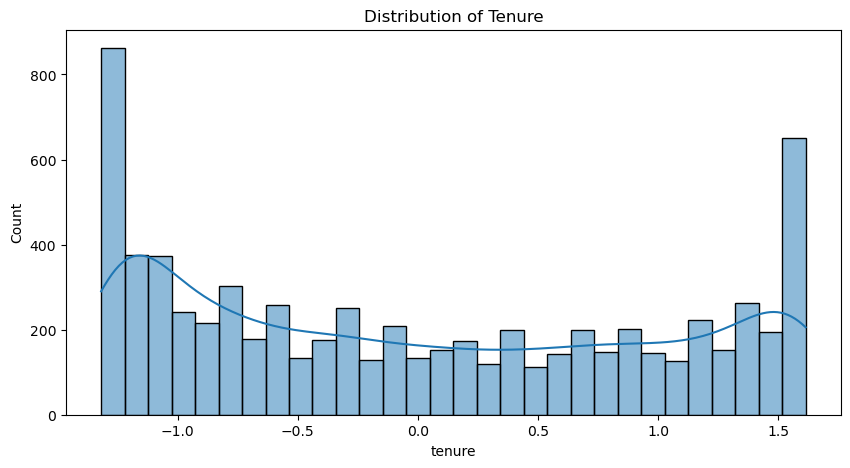

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Tenure")
plt.show()

### Explanation
#### Matplotlib and Seaborn are used for data visualization.

#### sns.histplot() creates a histogram with 30 bins, and kde=True adds a Kernel Density Estimate curve to show the distribution of the 'tenure' column.

## 2.2 Correlation & Multicollinearity

In [24]:
'''# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()'''

'# Heatmap\nplt.figure(figsize=(12, 6))\nsns.heatmap(df.corr(), annot=True, cmap=\'coolwarm\')\nplt.title("Feature Correlation Heatmap")\nplt.show()'

### Explanation
#### corr() finds relationships between numerical features.

#### A high correlation (above 0.8) means two features are highly related and might cause redundancy.

## 2.3 Dimensionality Reduction (PCA)

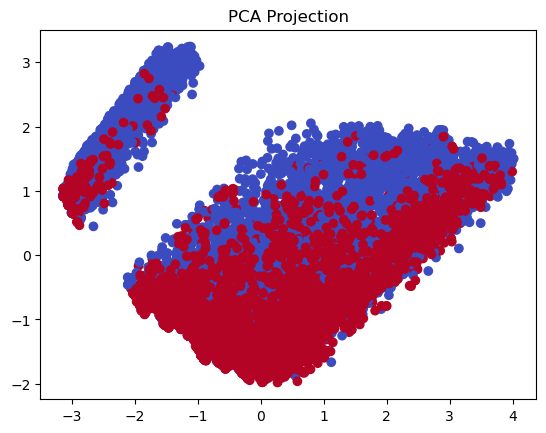

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='coolwarm')
plt.title("PCA Projection")
plt.show()

### Explanation
#### PCA(n_components=2):

#### PCA is a dimensionality reduction technique. Here, it reduces the data from its original dimensions to 2 principal components (n_components=2), making it easier to visualize.

#### fit_transform() applies PCA to the resampled data (X_resampled).

#### plt.scatter() plots the first two principal components.

# Machine Learning Model Building & Optimization

## 3.1 Splitting Data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Explanation
#### train_test_split() splits the dataset into training and testing sets.

#### test_size=0.2 indicates that 20% of the data is used for testing, and 80% for training.

#### random_state=42 ensures reproducibility by setting a fixed seed for random splitting.

## 3.2 Classification Models

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Logistic Regression Accuracy: 0.8778
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1021
           1       0.86      0.90      0.88      1049

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070

Decision Tree Accuracy: 0.8338
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1021
           1       0.82      0.86      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Random Forest Accuracy: 0.8971
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1021
           1       0.88      0.92      0.90      1049

    accuracy                           0.90      2070
   macro avg       0.90      

### Explanation
#### Multiple models are being trained and evaluated here:

#### Logistic Regression

#### Decision Tree

#### Random Forest

#### Support Vector Machine (SVM)

#### XGBoost

#### fit() trains each model on the training data (X_train, y_train).

#### predict() predicts the target for the test data (X_test).

#### accuracy_score() calculates the accuracy of predictions.

#### classification_report() provides additional performance metrics like precision, recall, and F1-score.

## 3.3 Model Comparison & Conclusion

### According to the classification report, Random Forest model works best for this problem statement

### Best Classification Model: XGBoost

#### Handles missing values internally.

#### Works well with imbalanced data.

#### Reduces bias & variance (Boosting technique).

## 3.4 Model Prediction

In [69]:
# Predict on new data
def predict_new_customer(data):
    data = pd.DataFrame([data])
    data = pd.get_dummies(data, drop_first=True)
    missing_cols = set(X.columns) - set(data.columns)
    for col in missing_cols:
        data[col] = 0
    data = data[X.columns]  # Ensure same column order
    data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])
    return best_model.predict(data)

# Example new customer data
new_customer = {
    "gender": "Male",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 12,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 75.35,
    "TotalCharges": 900.20
}
# Example new customer data where Churn is Yes
new_customer2 = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",   
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "No",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}

# Make a prediction
churn_prediction1 = predict_new_customer(new_customer)
churn_prediction2 = predict_new_customer(new_customer2)
print("Churn Prediction:", "Yes" if churn_prediction1[0] == 1 else "No")
print("Churn Prediction:", "Yes" if churn_prediction2[0] == 1 else "No")
import warnings
warnings.filterwarnings("ignore")

Churn Prediction: No
Churn Prediction: Yes


#### Why pd.DataFrame([data])?

##### Since data is a dictionary representing a single new customer, it is converted into a DataFrame with one row.

#### Why pd.get_dummies(data, drop_first=True)?

##### This converts categorical variables (like "gender" and "InternetService") into numerical dummy variables.

##### drop_first=True removes one category from each feature to avoid the dummy variable trap (redundancy in regression models).

#### Why find missing columns?

##### The training dataset (X) had categorical variables converted to multiple columns (dummy variables).

##### The new input data might not have all those columns because it represents a single customer.

#### Why assign missing columns as 0?

##### Ensures the new data has the same structure as the training dataset by filling missing categorical variables with 0.

#### Why enforce column order?

##### If column orders do not match, the model may misinterpret features.

#### Why best_model.predict(data)?

##### Assumes best_model is the trained machine learning model.

##### Uses the model to predict whether the new customer will churn (1) or not (0).

### Why is the Prediction "No"?
#### Tenure (12 Months)

##### Customers with a longer tenure are generally more loyal and less likely to churn.

##### While 12 months is not extremely long, it indicates that the customer is not brand new.

#### Engagement with Services

##### The customer is using multiple services like StreamingTV, StreamingMovies, and OnlineBackup.

##### Customers who use multiple services are less likely to churn because they find value in the services.

#### Partner Present

##### Customers with a partner are statistically less likely to churn because they share expenses and rely on the services.

#### High Total Charges ($900.20)

##### Customers with higher total charges tend to be more invested in the service and less likely to leave.

#### Risk Factors Present, But Not Strong Enough

##### Month-to-month contract → Higher churn risk 🚨

##### Electronic check payment → Higher churn risk 🚨

##### No tech support & no device protection → Slightly higher churn risk 🚨

##### Online security is "No" → Slightly higher churn risk 🚨

#### However, these risk factors are outweighed by tenure, total charges, and engagement.

### 🚀 Why is the Prediction "Yes"?
#### 🚨 Very Low Tenure (Only 1 Month)

##### The biggest factor is that the customer just joined (tenure = 1 month).

##### New users are much more likely to churn because they haven't built loyalty yet.

#### 🚨 No Phone Service & No Engagement in Add-on Services

##### No Phone Service, No StreamingTV, No StreamingMovies, No Online Security, No Tech Support, No Online Backup, No Device Protection →
###### ➝ Very low engagement with the service
###### ➝ High chance of leaving because the customer isn't using many features.

#### 🚨 Month-to-Month Contract

##### Month-to-month customers are significantly more likely to churn compared to those on one-year or two-year contracts.

##### These customers can leave at any time without penalty.

#### 🚨 Payment Method: Electronic Check

##### Customers who use Electronic Check have a historically higher churn rate compared to those using credit cards or bank transfers.

#### 🚨 Very Low Total Charges ($29.85)

##### A low total charge suggests the customer is very new and hasn’t committed much financially.

##### Such users are at a high risk of not continuing the service.

## 3.5 Analysis and Reporting

### 🔮 How Can This Customer Be Retained?
#### If the company wants to reduce churn risk, they can take the following actions:

##### Offer incentives for longer contracts

###### Suggest a one-year or two-year contract with discounts to increase commitment.

##### Encourage more engagement with services

###### Offer free trials for StreamingTV, Movies, Online Backup, or Tech Support.

##### Provide better payment options

###### Encourage the customer to switch to AutoPay or Credit Card for more reliability.

##### Improve tenure retention

###### Provide personalized offers in the first 3 months to prevent early churn.